In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import time 

df = pd.read_pickle('data/pkl/inflacion.xlsx.pkl')
df

,d,v
0,1990-01-31,79.2
1,1990-02-28,61.6
2,1990-03-31,95.5
3,1990-04-30,11.4
4,1990-05-31,13.6
...,...,...
391,2022-08-31,7.0
392,2022-09-30,6.2
393,2022-10-31,6.3
394,2022-11-30,4.9


In [2]:
# renaming for fbprophet
df.rename(columns={'d':'ds'}, inplace=True)
df.rename(columns={'v':'y'}, inplace=True)
df.reset_index(inplace=True)
df.head()

,index,ds,y
0,0,1990-01-31,79.2
1,1,1990-02-28,61.6
2,2,1990-03-31,95.5
3,3,1990-04-30,11.4
4,4,1990-05-31,13.6


In [3]:
df.rename(columns={'Fecha':'ds'}, inplace=True)

In [4]:
df = df[df['ds'] >= '2018-01-01']

df

,index,ds,y
336,336,2018-01-31,1.8
337,337,2018-02-28,2.4
338,338,2018-03-31,2.3
339,339,2018-04-30,2.7
340,340,2018-05-31,2.1
341,341,2018-06-30,3.7
342,342,2018-07-31,3.1
343,343,2018-08-31,3.9
344,344,2018-09-30,6.5
345,345,2018-10-31,5.4


In [5]:
df = df.sort_values(by='ds')

In [6]:
df['y'].round(2).describe()

count    60.000000
mean      3.755000
std       1.441212
min       1.500000
25%       2.700000
50%       3.500000
75%       4.700000
max       7.400000
Name: y, dtype: float64

In [7]:
from prophet import Prophet

prophet_model = Prophet()
prophet_model.fit(df)

c:\Users\rodri\anaconda3.1\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
16:58:46 - cmdstanpy - INFO - Chain [1] start processing
16:58:47 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
future_dataset= prophet_model.make_future_dataframe(periods=1, freq='y') # Data para el proximo año
future_dataset.tail()

,ds
56,2022-09-30
57,2022-10-31
58,2022-11-30
59,2022-12-31
60,2023-12-31


In [9]:
pred = prophet_model.predict(future_dataset)
pred[['ds','yhat', 'yhat_lower', 'yhat_upper']].head() # only useful columns

,ds,yhat,yhat_lower,yhat_upper
0,2018-01-31,2.274411,0.899025,3.672017
1,2018-02-28,2.530750,1.163241,3.878926
2,2018-03-31,3.493731,2.115578,4.700078
3,2018-04-30,2.709998,1.336809,4.082369
4,2018-05-31,2.076809,0.700689,3.468490


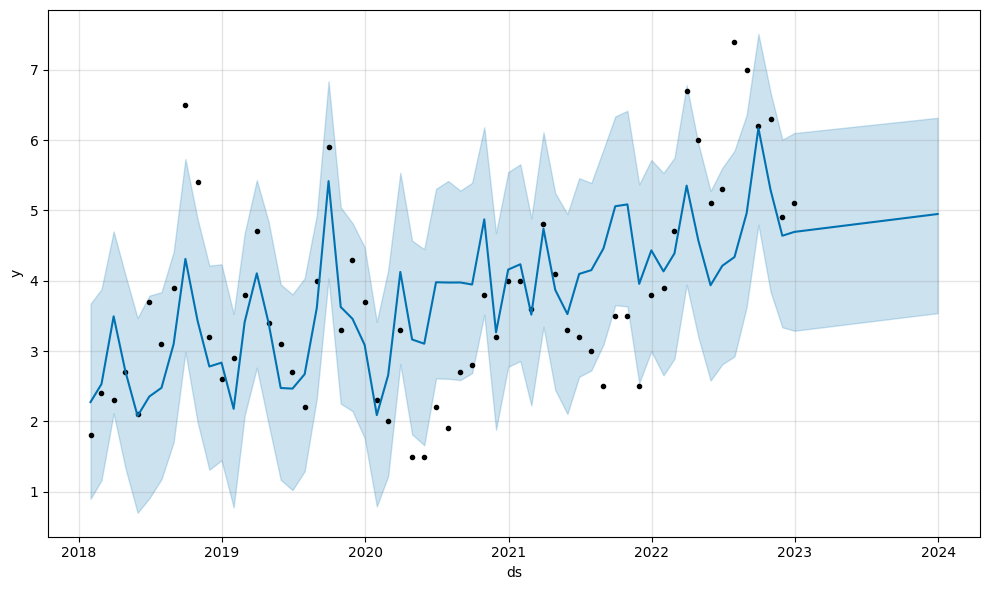

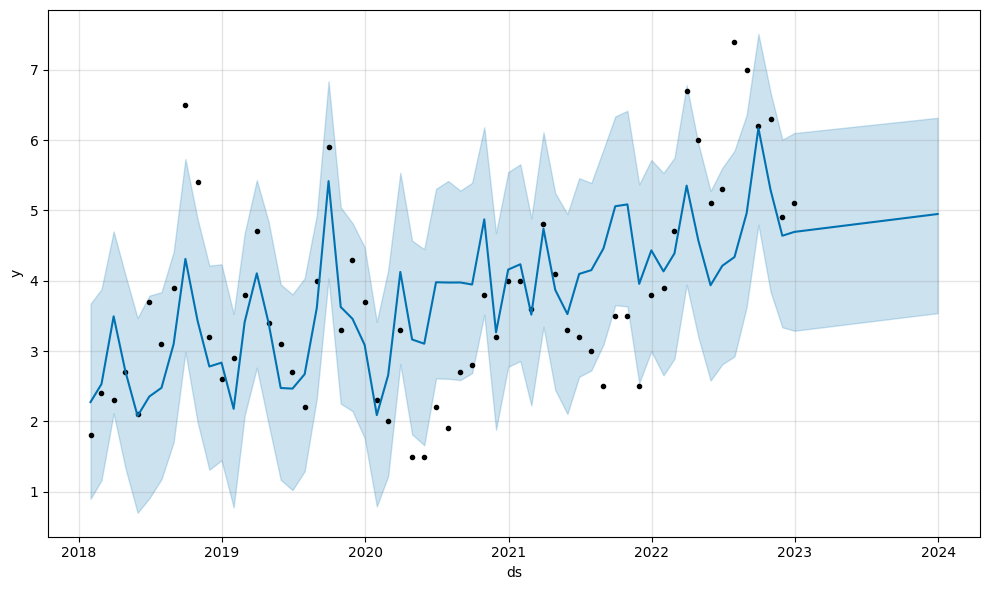

In [10]:
prophet_model.plot(pred)

In [11]:
def fb_prophet_function(data, future_years, seasonality_name, seasonality_val,seasonality_fourier, **params):
    """
    Trains a fb prophet model on given hyperparameters and custom
    seasonality, predicts on future dataset, plot the results and
    return the model.
    """
    start= time.time()
    prophet_model = Prophet(**params)
    
    prophet_model.add_seasonality(name=seasonality_name, period=seasonality_val, fourier_order=seasonality_fourier)
        
    prophet_model.fit(data)
    
    future_dataset = prophet_model.make_future_dataframe(periods=future_years, freq='y')
    
    pred = prophet_model.predict(future_dataset)
    
    prophet_model.plot(pred, figsize=(15,7));
    plt.ylim(-500, 3000)
    plt.title(f"fourier order{seasonality_fourier}, seasonality time {seasonality_name}")
    plt.show()
    
    end = time.time()
    print(f"Total Execution Time {end-start} seconds")
    return prophet_model

In [12]:
def plot_valid(validation_set, size, model):
    pred = model.predict(validation_set)
    temp = df[-size:].copy().reset_index()
    temp['pred']=pred['yhat']
    temp.set_index('ds')[['y', 'pred']].plot()
    plt.tight_layout();

16:58:52 - cmdstanpy - INFO - Chain [1] start processing
16:59:52 - cmdstanpy - INFO - Chain [1] done processing


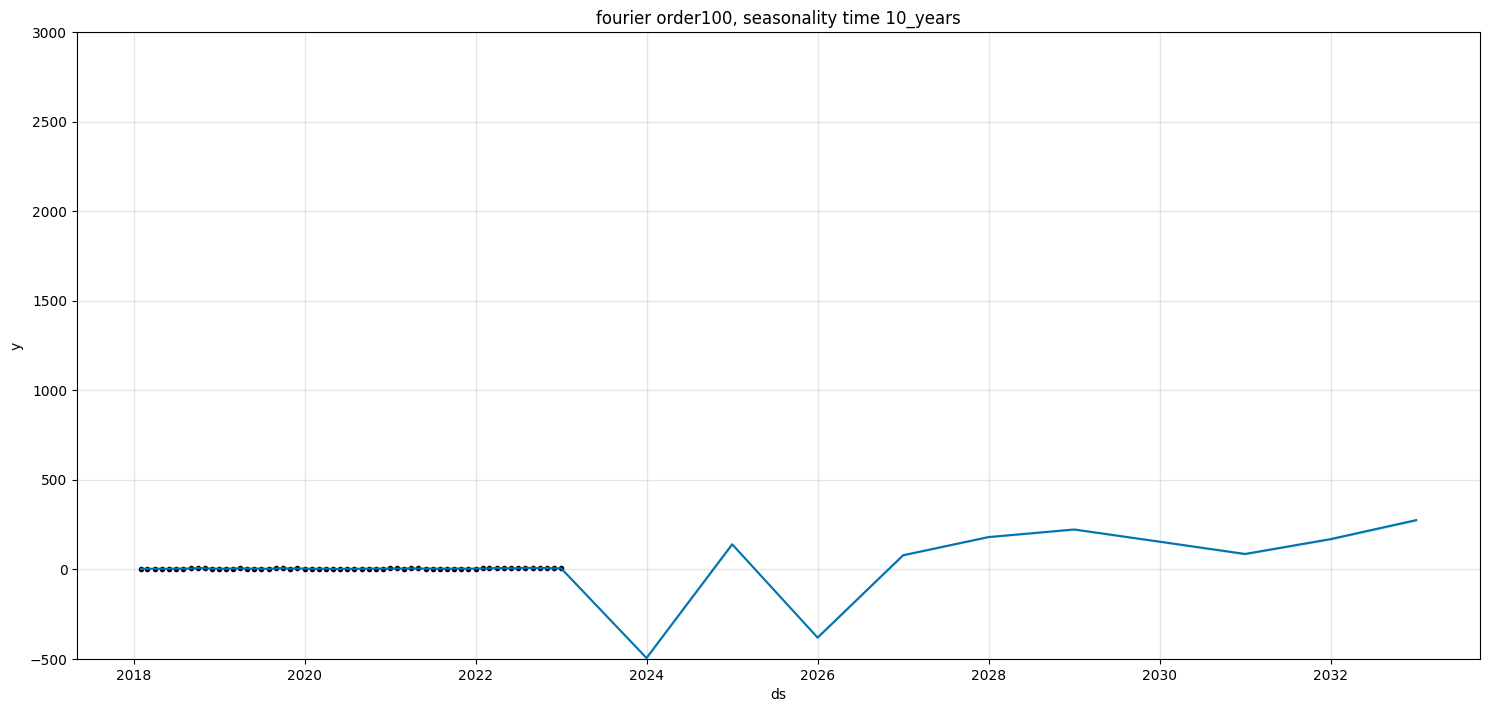

Total Execution Time 63.54911756515503 seconds


In [13]:
import time

training_set = df
validation_set = df 

ten_years = fb_prophet_function(data=training_set, future_years=10, seasonality_name='10_years', seasonality_val=365*10, seasonality_fourier=100,seasonality_mode='additive')

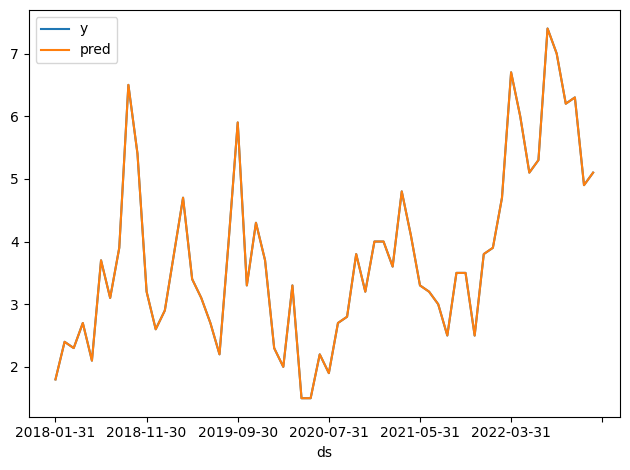

In [14]:
plot_valid(validation_set, 1000, ten_years)

In [15]:
pred = pred[['ds', 'yhat']]

pred

,ds,yhat
0,2018-01-31,2.274411
1,2018-02-28,2.530750
2,2018-03-31,3.493731
3,2018-04-30,2.709998
4,2018-05-31,2.076809
...,...,...
56,2022-09-30,6.169248
57,2022-10-31,5.290137
58,2022-11-30,4.639772
59,2022-12-31,4.694431


In [16]:
validation_set = validation_set[['ds', 'y']]

validation_set

,ds,y
336,2018-01-31,1.8
337,2018-02-28,2.4
338,2018-03-31,2.3
339,2018-04-30,2.7
340,2018-05-31,2.1
341,2018-06-30,3.7
342,2018-07-31,3.1
343,2018-08-31,3.9
344,2018-09-30,6.5
345,2018-10-31,5.4


In [17]:
pred = pred[pred['ds'].isin(validation_set['ds'])]

pred

,ds,yhat
0,2018-01-31,2.274411
1,2018-02-28,2.530750
2,2018-03-31,3.493731
3,2018-04-30,2.709998
4,2018-05-31,2.076809
5,2018-06-30,2.354110
6,2018-07-31,2.477341
7,2018-08-31,3.100715
8,2018-09-30,4.310113
9,2018-10-31,3.430881


In [18]:
validation_set['ds'] = pd.to_datetime(validation_set['ds'])
pred['ds'] = pd.to_datetime(pred['ds'])

C:\Users\rodri\AppData\Local\Temp\ipykernel_2996\3192936091.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_set['ds'] = pd.to_datetime(validation_set['ds'])
C:\Users\rodri\AppData\Local\Temp\ipykernel_2996\3192936091.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred['ds'] = pd.to_datetime(pred['ds'])


In [19]:
merged1 = pd.merge(pred, validation_set, on='ds', how='inner')

validation_ds_y = merged1[['ds', 'y']]
pred_ds_yhat = merged1[['ds', 'yhat']]

In [20]:
validation_ds_y['ds'] = validation_ds_y['ds'].apply(lambda x: x.timestamp())
pred_ds_yhat['ds'] = pred_ds_yhat['ds'].apply(lambda x: x.timestamp())

C:\Users\rodri\AppData\Local\Temp\ipykernel_2996\2616818827.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_ds_y['ds'] = validation_ds_y['ds'].apply(lambda x: x.timestamp())
C:\Users\rodri\AppData\Local\Temp\ipykernel_2996\2616818827.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_ds_yhat['ds'] = pred_ds_yhat['ds'].apply(lambda x: x.timestamp())


In [21]:
validation_ds_y['ds'] = validation_ds_y['ds'].astype(float)
pred_ds_yhat['ds'] = pred_ds_yhat['ds'].astype(float)

C:\Users\rodri\AppData\Local\Temp\ipykernel_2996\476390056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation_ds_y['ds'] = validation_ds_y['ds'].astype(float)
C:\Users\rodri\AppData\Local\Temp\ipykernel_2996\476390056.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pred_ds_yhat['ds'] = pred_ds_yhat['ds'].astype(float)


In [22]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mae1 = mean_absolute_error(validation_ds_y, pred_ds_yhat)
mse1 = mean_squared_error(validation_ds_y, pred_ds_yhat)
rmse1 = math.sqrt(mean_squared_error(validation_ds_y, pred_ds_yhat))

print("Mean Absolute Error: ", mae1)
print("Mean Squared Error: ", mse1)
print("Root Mean Squared Error: ", rmse1)


Mean Absolute Error:  0.4174026894871689
Mean Squared Error:  0.5809542609873215
Root Mean Squared Error:  0.7622035561366278


In [23]:
training_set = df
validation_set = df

five_years_model = fb_prophet_function(data=training_set, future_years=10, seasonality_name='10_years', seasonality_val=365*10, seasonality_fourier=150,seasonality_mode='additive')

17:00:04 - cmdstanpy - INFO - Chain [1] start processing


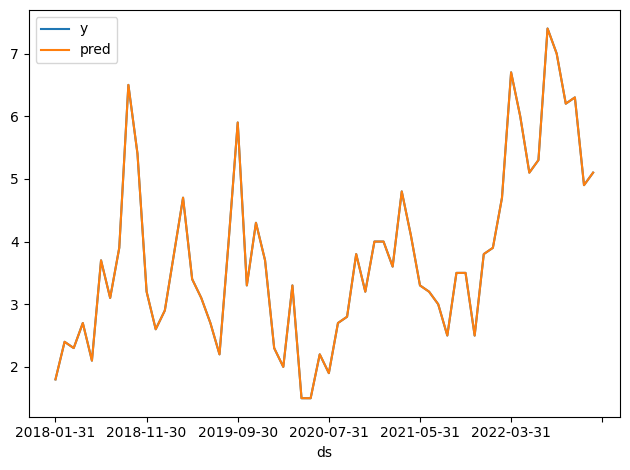

In [ ]:
plot_valid(validation_set, 1000, five_years_model)

In [ ]:
from prophet import Prophet

five_years_model = Prophet(seasonality_mode='additive', seasonality_prior_scale=1, 
                         yearly_seasonality=True, weekly_seasonality=False, 
                         daily_seasonality=False)


In [ ]:
five_years_model.add_seasonality(name='1_years', period=365*1, fourier_order=100)

In [ ]:
import datetime

today = datetime.datetime.now()
next_year = today + datetime.timedelta(days=365)
start_date = today.strftime("%Y-%m-%d")
end_date = next_year.strftime("%Y-%m-%d")
date_range = pd.date_range(start_date, end_date, freq='M')
next_year = pd.DataFrame({"ds": date_range})


In [ ]:
five_years_model.fit(training_set)

prediction = five_years_model.predict(next_year)

11:19:42 - cmdstanpy - INFO - Chain [1] start processing
11:19:47 - cmdstanpy - INFO - Chain [1] done processing


In [ ]:
values = prediction['yhat']

values_new = pd.DataFrame(values)

values_new = values_new.rename(columns={'yhat':'Values'})

values_new

,Values
0,5.182764
1,6.389457
2,8.027642
3,6.707359
4,5.510855
5,5.025594
6,7.130653
7,7.078741
8,6.853378
9,6.676135


In [ ]:
# import the datetime library
import datetime

# define the start date (next month) and the number of months in the range
start_date = (datetime.datetime.today() + datetime.timedelta(days=1)).replace(day=1)
start_date = start_date.replace(month = (start_date.month % 12) + 1)
num_months = 12

# create the date range
date_range = [start_date.date() + datetime.timedelta(days=30*i) for i in range(num_months)]

# set the index of the dataframe to the date range
values_new.index = date_range

values_new


,Values
2023-02-01,5.182764
2023-03-03,6.389457
2023-04-02,8.027642
2023-05-02,6.707359
2023-06-01,5.510855
2023-07-01,5.025594
2023-07-31,7.130653
2023-08-30,7.078741
2023-09-29,6.853378
2023-10-29,6.676135


In [ ]:
values_new.to_excel("data/xlsx/values_newOf.xlsx")

In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyo

trace = go.Scatter(x=x, y=y, mode='lines', line=dict(color='blue', width=1), name='Prediccion')
data = [trace]

layout = go.Layout(title='Prediccion de Inflacion mensual', 
                  xaxis=dict(title='Meses', gridcolor='rgb(255,255,255)', zerolinecolor='rgb(255,255,255)', showgrid=True, showline=True),
                  yaxis=dict(title='Valor', gridcolor='rgb(255,255,255)', zerolinecolor='rgb(255,255,255)', showgrid=True, showline=True),
                  showlegend=True, plot_bgcolor='rgb(250,250,250)')

fig = go.Figure(data=data, layout=layout)
pyo.iplot(fig)


In [ ]:
with open('data/html/Pred_Inflacion.html', 'w') as f:
    f.write(fig.to_html(include_plotlyjs='cdn'))